In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Bronowice = pd.read_csv("results/bronowice_100.csv", index_col=0)
Bronowice['Obszar']='Bronowice'
Skotniki = pd.read_csv("results/skotniki_100.csv", index_col=0)
Skotniki['Obszar']='Skotniki'
df = pd.concat([Bronowice, Skotniki])
df['p-wo wyboru'] = df['p_SUM']
df['spadek czasu oczekiwania na transport publiczny'] = df['tw_PT_OD'] - df['tw_PT_HD']
df['atrakcyjność nowej usługi'] = df['u_PT_OD']-df['u_SUM_OD']
mu = -0.1
df['wartość dodana'] = np.log(np.exp(mu*df['u_PT_OD'])+np.exp(mu*df['u_SUM_OD'])-np.log(np.exp(mu*df['u_PT_OD'])))
df

,tw_PT_OD,tw_PT_HD,u_PT_OD,u_PT_HD,u_SUM_OD,p_SUM,Obszar,p-wo wyboru,spadek czasu oczekiwania na transport publiczny,atrakcyjność nowej usługi,wartość dodana
0,102.269311,39.561077,14.542658,10.271394,16.722841,0.371984,Bronowice,0.371984,62.708234,-2.180183,0.628958
1,82.268191,34.803719,14.059999,10.042197,16.375049,0.336021,Bronowice,0.336021,47.464472,-2.315050,0.612797
2,89.628392,36.592133,14.093780,9.964376,16.369593,0.343866,Bronowice,0.343866,53.036260,-2.275813,0.614236
3,77.704403,29.049587,13.936390,9.774292,16.228619,0.371505,Bronowice,0.371505,48.654816,-2.292229,0.609300
4,92.948133,29.301031,14.384870,9.982009,16.542511,0.356629,Bronowice,0.356629,63.647102,-2.157641,0.624338
...,...,...,...,...,...,...,...,...,...,...,...
95,99.456647,46.258621,14.014748,8.974993,15.162799,0.382761,Skotniki,0.382761,53.198027,-1.148051,0.624459
96,107.919075,47.695402,14.896570,9.971839,16.173533,0.394656,Skotniki,0.394656,60.223673,-1.276964,0.648950
97,96.430233,41.433526,14.645161,9.270779,15.305602,0.442793,Skotniki,0.442793,54.996707,-0.660441,0.648213
98,107.876471,37.697674,14.674752,9.516974,15.673939,0.435247,Skotniki,0.435247,70.178796,-0.999187,0.645306


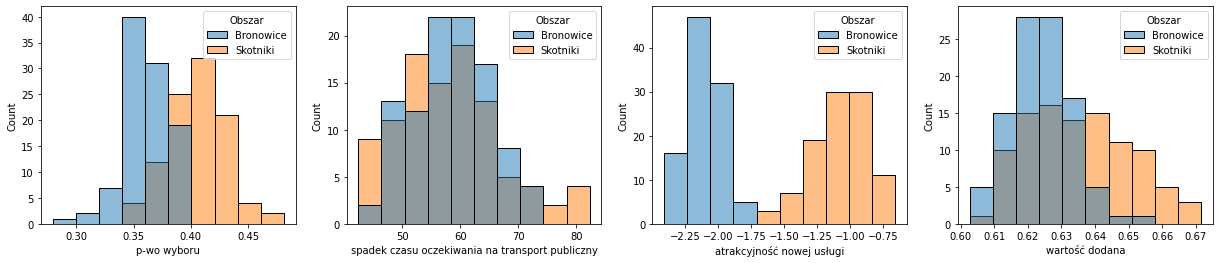

In [3]:
fig, ax = plt.subplots(1,4, figsize=(21,4))
                       
for i, col in enumerate(df.columns[-4:]):
    sns.histplot(data = df, x = col,  hue = 'Obszar', bins = 10, ax = ax[i])
    

In [4]:
d = df.groupby('Obszar').mean()

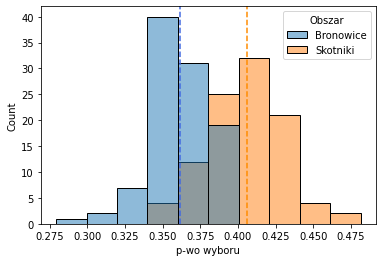

In [6]:
sns.histplot(data = df, x = df['p-wo wyboru'], hue = 'Obszar', bins = 10)
plt.axvline(d.loc['Bronowice', 'p-wo wyboru'], linestyle='--', color="royalblue")
plt.axvline(d.loc['Skotniki', 'p-wo wyboru'], linestyle='--', color="darkorange")
# plt.savefig('results/images/p-wo_wyboru.png', dpi=300)
plt.show()

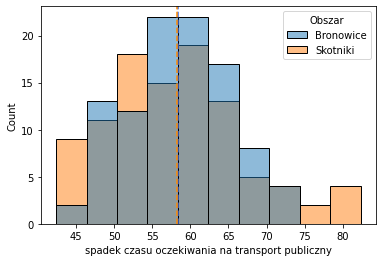

In [ ]:
sns.histplot(data = df, x = df['spadek czasu oczekiwania na transport publiczny'], hue = 'Obszar', bins = 10)
plt.axvline(d.loc['Bronowice', 'spadek czasu oczekiwania na transport publiczny'], linestyle='--', color="royalblue")
plt.axvline(d.loc['Skotniki', 'spadek czasu oczekiwania na transport publiczny'], linestyle='--', color="darkorange")
plt.savefig('results/images/spadek_czasu_oczek.png', dpi=300)
plt.show()

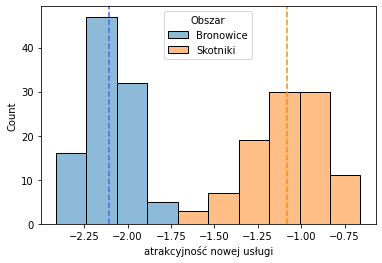

In [12]:
sns.histplot(data = df, x = df['atrakcyjność nowej usługi'], hue = 'Obszar', bins = 10)
plt.axvline(d.loc['Bronowice', 'atrakcyjność nowej usługi'], linestyle='--', color="royalblue")
plt.axvline(d.loc['Skotniki', 'atrakcyjność nowej usługi'], linestyle='--', color="darkorange")
plt.savefig('images/atrakcyjnosc.png', dpi=300)
plt.show()

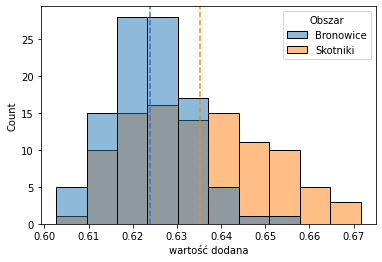

In [7]:
sns.histplot(data = df, x = df['wartość dodana'], hue = 'Obszar', bins = 10)
plt.axvline(d.loc['Bronowice', 'wartość dodana'], linestyle='--', color="royalblue")
plt.axvline(d.loc['Skotniki', 'wartość dodana'], linestyle='--', color="darkorange")
# plt.savefig('results/images/wartosc_dodana.png', dpi=300)
plt.show()

In [8]:
d = round(d, 3)
d

,tw_PT_OD,tw_PT_HD,u_PT_OD,u_PT_HD,u_SUM_OD,p_SUM,p-wo wyboru,spadek czasu oczekiwania na transport publiczny,atrakcyjność nowej usługi,wartość dodana
Obszar,,,,,,,,,,
Bronowice,93.807,35.476,14.352,10.036,16.456,0.362,0.362,58.331,-2.105,0.624
Skotniki,94.579,36.280,14.356,9.277,15.435,0.406,0.406,58.299,-1.079,0.635


In [48]:
# d.to_csv("results/results_SUM.csv")